# Deep learning example with IRIS data 
# 관련 패키지 설치 후 예제 코드 실행 가능 (Shift+Enter로 실행)
## 1. Import libraries and modules

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

## 2. Load data

In [9]:
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target
X.shape, y.shape

((150, 4), (150,))

## 3. Check data set

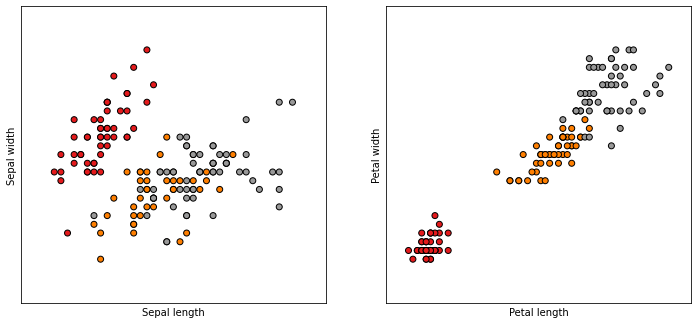

In [3]:
plt.figure(1, figsize=(12, 12))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
ax1=plt.subplot(221)
# Plot the training points
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')

ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax1.set_xticks(())
ax1.set_yticks(())

ax2=plt.subplot(222)
x_min, x_max = X[:, 2].min() - .5, X[:, 2].max() + .5
y_min, y_max = X[:, 3].min() - .5, X[:, 3].max() + .5

# Plot the training points
ax2.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
ax2.set_xlabel('Petal length')
ax2.set_ylabel('Petal width')

ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)
ax2.set_xticks(())
ax2.set_yticks(())

plt.show()

In [4]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

<ipython-input-4-1dbe145c21fc>:8: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-4-1dbe145c21fc>:10: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-4-1dbe145c21fc>:12: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


<Figure size 576x432 with 0 Axes>

In [5]:
X[:5], y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]), array([0, 0, 0, 0, 0]))

In [6]:
np.unique(y)

array([0, 1, 2])

## 4. Prepare data set for training

In [10]:
y=np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

## 5. Define the keras model

In [11]:
model=Sequential()
model.add(Dense(8,input_dim=4, activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


## 6. Complie and fit the keras model

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history=model.fit(X_train,y_train,batch_size=5,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
23/23 [==============================] - 1s 12ms/step - loss: 1.3268 - accuracy: 0.3393 - val_loss: 1.1748 - val_accuracy: 0.3158
Epoch 2/20
23/23 [==============================] - 0s 4ms/step - loss: 1.0588 - accuracy: 0.3304 - val_loss: 0.9813 - val_accuracy: 0.3421
Epoch 3/20
23/23 [==============================] - 0s 4ms/step - loss: 0.9264 - accuracy: 0.5089 - val_loss: 0.8979 - val_accuracy: 0.5526
Epoch 4/20
23/23 [==============================] - 0s 4ms/step - loss: 0.8537 - accuracy: 0.5625 - val_loss: 0.8351 - val_accuracy: 0.5526
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.7868 - accuracy: 0.5625 - val_loss: 0.7721 - val_accuracy: 0.5526
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.7395 - accuracy: 0.6071 - val_loss: 0.7270 - val_accuracy: 0.5526
Epoch 7/20
23/23 [==============================] - 0s 4ms/step - loss: 0.7010 - accuracy: 0.6250 - val_loss: 0.6935 - val_accuracy: 0.6053
Epoch 8/20
23/23 [=

## 7. Check the training results

In [14]:
results=pd.DataFrame(history.history)
results

,loss,accuracy,val_loss,val_accuracy
0,1.326822,0.339286,1.174814,0.315789
1,1.058766,0.330357,0.981323,0.342105
2,0.926415,0.508929,0.897879,0.552632
3,0.853714,0.562500,0.835108,0.552632
4,0.786839,0.562500,0.772107,0.552632
5,0.739541,0.607143,0.726951,0.552632
6,0.701044,0.625000,0.693485,0.605263
7,0.672073,0.580357,0.665822,0.605263
8,0.647583,0.589286,0.640044,0.605263
9,0.622076,0.633929,0.620638,0.605263


<Axes: >

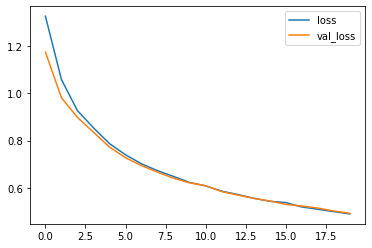

In [17]:
%matplotlib inline
results[['loss','val_loss']].plot()

<Axes: >

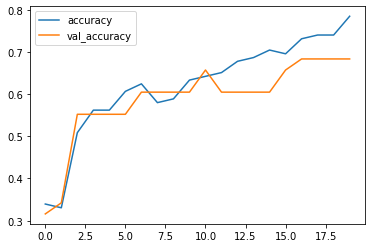

In [18]:
results[['accuracy','val_accuracy']].plot()